In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import auc, recall_score, roc_curve , roc_auc_score, accuracy_score,classification_report,confusion_matrix,f1_score,precision_score


In [21]:
df= pd.read_csv("D:\\Nithin\\LB\\FRSH\\Project\\Coupon acceptance\\Data.csv")
rown,coln = df.shape
print(f'There are {rown} number of rows and {coln} number of columns')

There are 12684 number of rows and 25 number of columns


In [22]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [23]:
df.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
data_dictionary = {
    "1. Gender": ["Female, Male"],
    "2. Age": ["21, 46, 26, 31, 41, 50plus, 36, below21"],
    "3. Marital Status": ["Unmarried partner, Single, Married partner, Divorced, Widowed"],
    "4. has_Children": ["1: has children, 0: No children"],
    "5. Education": ["Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School"],
    "6. Occupation": ["Traveller’s occupation"],
    "7. Income": ["income of the traveler"],
    "8. Car": ["Description of vehicle driven by the traveller"],
    "9. Bar": ["How many times does the traveler go to a bar every month?"],
    "10. Coffee House": ["How many times does the user go to a coffeehouse every month?"],
    "11. Carry Away": ["How many times does the user get takeaway food every month?"],
    "12. RestaurantLessThan20": ["How many times does the user go to a restaurant with an average expense per person of less than $20 every month?"],
    "13. Restaurant20To50": ["How many times does the user go to a restaurant with an average expense per person of $20 — $50 every month"],
    "14. Destination": ["Destination of traveler"],
    "15. Passenger": ["Who are the passengers in the car"],
    "16. Weather": ["Weather when the user is driving (Sunny, Rainy, Snowy)"],
    "17. Temperature": ["Temperature in Fahrenheit when the user is driving"],
    "18. Coupon": ["Type of Coupon"],
    "19. Expiration": ["Validity of Coupon"],
    "20. toCoupon_GEQ5min": ["Driving distance to restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)"],
    "21. toCoupon_GEQ15min": ["Driving distance to restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)"],
    "22. toCoupon_GEQ25min": ["Driving distance to restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)"],
    "23. direction_same": ["Whether the restaurant/cafe/bar is in the same direction as the traveler's current destination (0,1)"],
    "24. direction_opp": ["Whether the restaurant/cafe/bar is in the opposite direction as the user's current destination (0,1)"],
    "25. Accept(Y/N?)": ["Target column (whether user will accept the coupon or not?)"]
                }
data_arr=[]
for key,value in data_dictionary.items():
    data_arr.append([key,value])

Data_df = pd.DataFrame(data_arr,columns=['Column','Explanation'])
Data_df

,Column,Explanation
0,1. Gender,"[Female, Male]"
1,2. Age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
2,3. Marital Status,"[Unmarried partner, Single, Married partner, Divorced, Widowed]"
3,4. has_Children,"[1: has children, 0: No children]"
4,5. Education,"[Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School]"
5,6. Occupation,[Traveller’s occupation]
6,7. Income,[income of the traveler]
7,8. Car,[Description of vehicle driven by the traveller]
8,9. Bar,[How many times does the traveler go to a bar every month?]
9,10. Coffee House,[How many times does the user go to a coffeehouse every month?]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [26]:
unique_val = []
pd.set_option('display.max_colwidth', None)
for column in df:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    unique_val.append([column,num_unique,unique_values])
Unique_df = pd.DataFrame(unique_val , columns=['Column','Num_unique','unique'])
Unique_df


,Column,Num_unique,unique
0,destination,3,"[No Urgent Place, Home, Work]"
1,passanger,4,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,3,"[Sunny, Rainy, Snowy]"
3,temperature,3,"[55, 80, 30]"
4,coupon,5,"[Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant(20-50)]"
5,expiration,2,"[1d, 2h]"
6,gender,2,"[Female, Male]"
7,age,8,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
8,maritalStatus,5,"[Unmarried partner, Single, Married partner, Divorced, Widowed]"
9,has_children,2,"[1, 0]"


In [27]:
duplicate_rows = df[df.duplicated()]
print("Number of Duplicated Rows",len(duplicate_rows))
a = ((len(duplicate_rows)/rown)*100) 
print(f"Duplicate rows percentage : {a:.2f} %")

Number of Duplicated Rows 291
Duplicate rows percentage : 2.29 %


## Handling Missing Values

In [28]:
print("Null Value Counts:")
print(df.isnull().sum())

Null Value Counts:
destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64


In [29]:
car_null = ((df['car'].isnull().sum())/(len(df['car']))*100)
print(f"The percentage of missing values in the Car feature {car_null:.3f} %" )
df.drop('car',axis=1,inplace=True)                                          

The percentage of missing values in the Car feature 99.149 %


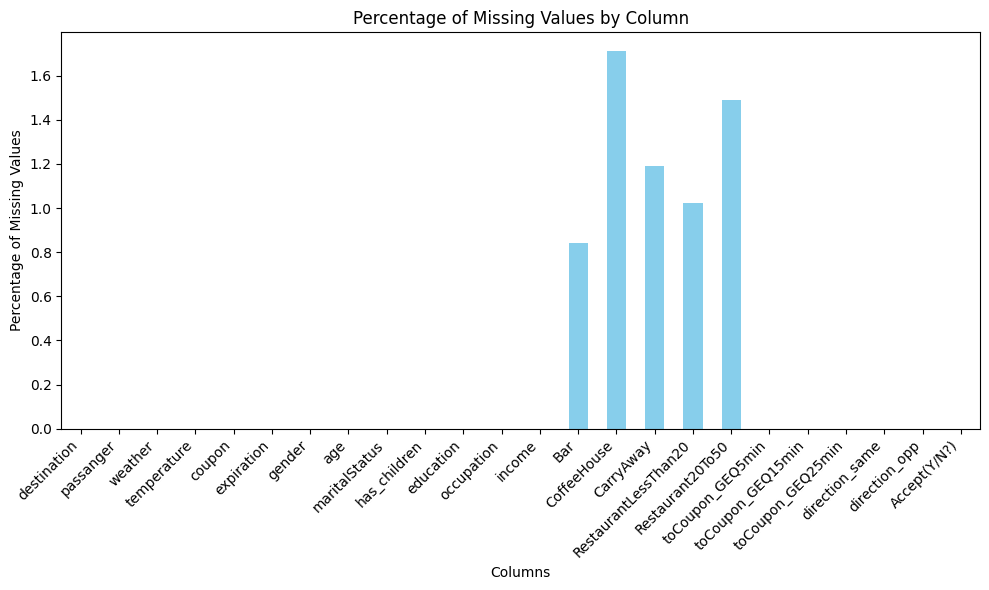

In [30]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

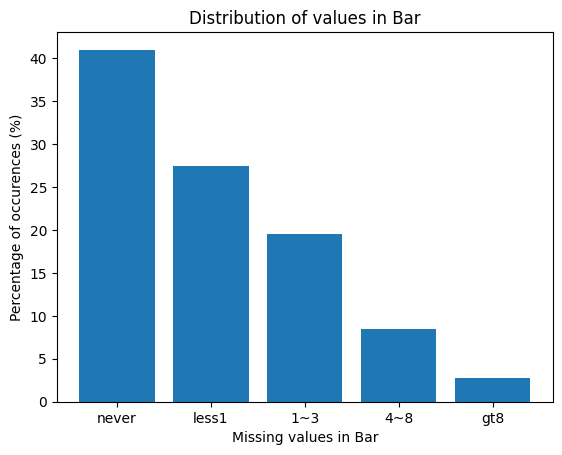

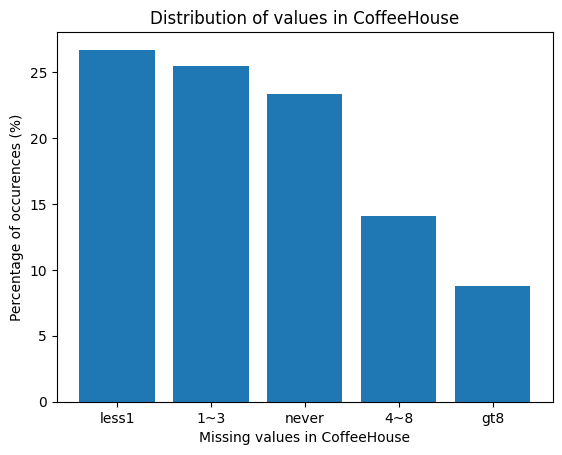

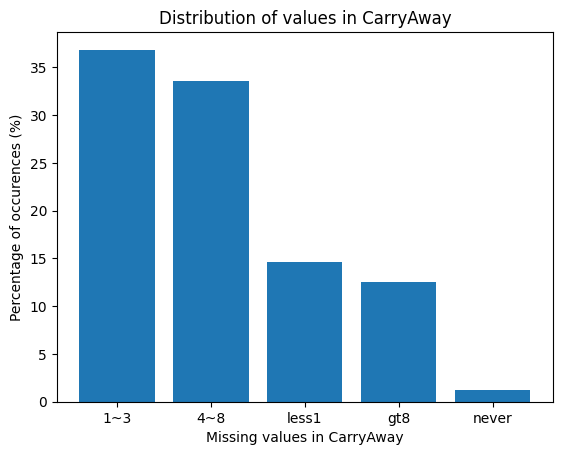

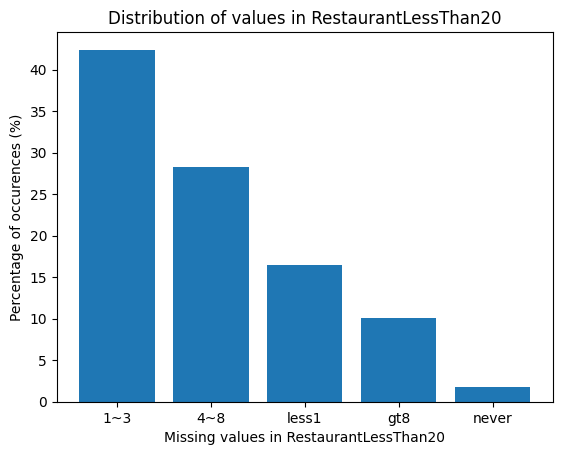

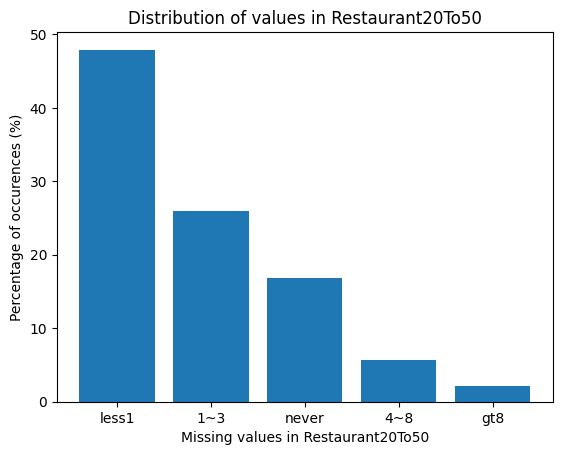

In [31]:
missing_val_cols = df.columns[df.isna().any()]
for i in missing_val_cols:
    value_counts = df[i].value_counts()
    total_values = len(df[i])
    percentage_counts = (value_counts / total_values)*100
    plt.bar(percentage_counts.index,percentage_counts.values)
    plt.xlabel(f'Missing values in {i}')
    plt.ylabel("Percentage of occurences (%)")
    plt.title(f"Distribution of values in {i}")
    plt.show()


In [32]:
for col in missing_val_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode,inplace=True)

## Encoding features

In [33]:
cat_cols_lte4 = []
cat_cols_gt4 = []
for i in df:
    if len(df[i].unique())<=4:
        cat_cols_lte4.append(i)
    else:
        cat_cols_gt4.append(i)
cat_cols_lte4.remove('Accept(Y/N?)')

print(f"The columns to be OHE are \n {cat_cols_lte4} \n and the columns to be Label encoded are \n {cat_cols_gt4}")

The columns to be OHE are 
 ['destination', 'passanger', 'weather', 'temperature', 'expiration', 'gender', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp'] 
 and the columns to be Label encoded are 
 ['coupon', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [34]:
OHE = OneHotEncoder()
OHE.fit(df[cat_cols_lte4])
encoded = OHE.transform(df[cat_cols_lte4]).toarray()
encoded_df = pd.DataFrame(encoded,columns = OHE.get_feature_names_out(cat_cols_lte4))
df.drop(columns=cat_cols_lte4,inplace = True)
df = pd.concat([df,encoded_df],axis =1 )

In [35]:
le = LabelEncoder()
for col in cat_cols_gt4:
    df["e_"+ col] = le.fit_transform(df[col])
df.drop(columns = cat_cols_gt4,axis = 1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Accept(Y/N?)                 12684 non-null  int64  
 1   destination_Home             12684 non-null  float64
 2   destination_No Urgent Place  12684 non-null  float64
 3   destination_Work             12684 non-null  float64
 4   passanger_Alone              12684 non-null  float64
 5   passanger_Friend(s)          12684 non-null  float64
 6   passanger_Kid(s)             12684 non-null  float64
 7   passanger_Partner            12684 non-null  float64
 8   weather_Rainy                12684 non-null  float64
 9   weather_Snowy                12684 non-null  float64
 10  weather_Sunny                12684 non-null  float64
 11  temperature_30               12684 non-null  float64
 12  temperature_55               12684 non-null  float64
 13  temperature_80  

## Splitting the dataset

In [37]:

X= df.drop('Accept(Y/N?)', axis = 1)
y = df['Accept(Y/N?)']
X.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,e_age,e_maritalStatus,e_education,e_occupation,e_income,e_Bar,e_CoffeeHouse,e_CarryAway,e_RestaurantLessThan20,e_Restaurant20To50
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,3,5,24,3,4,4,0,1,0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,3,5,24,3,4,4,0,1,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,3,5,24,3,4,4,0,1,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,3,5,24,3,4,4,0,1,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,3,5,24,3,4,4,0,1,0


Text(0, 0.5, 'Count')

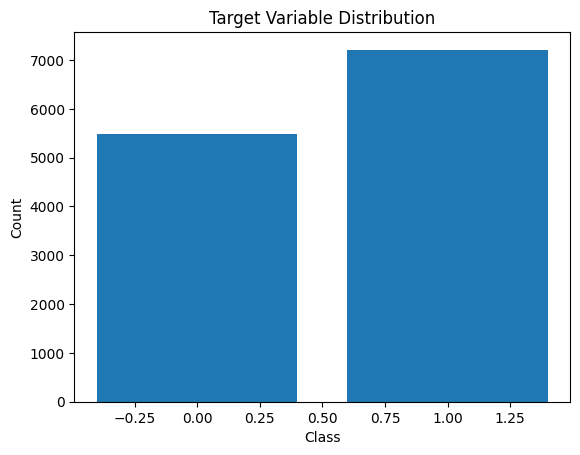

In [38]:
from collections import Counter
t_counts = Counter(y)
plt.bar(t_counts.keys(),t_counts.values())
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
scaler =  StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

print("X_train shape - ",X_train.shape)
print("X_test shape - ",X_test.shape)

print("y_train shape - ",y_train.shape)
print("y_test shape - ",y_test.shape)

X_train shape -  (10147, 39)
X_test shape -  (2537, 39)
y_train shape -  (10147,)
y_test shape -  (2537,)


## Model Training

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [41]:
classifiers = {
    'Logistic Regression':LogisticRegression(random_state = 42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB()
}
results={}

In [42]:

from sklearn import metrics

for model_name, model in(classifiers.items()):
  model.fit(X_train, y_train)
  
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
  test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
  
  f1_train = metrics.f1_score(y_train, y_train_pred)
  recall_train = recall_score(y_train, y_train_pred)
  precision_train = precision_score(y_train, y_train_pred)
  
  print(f'{model_name}:')
  print(f'Training Accuracy: {train_accuracy:.4f}')
  print(f'Test Accuracy: {test_accuracy:.4f}')
  
  print(f'F1 Score : {f1_train:.4f}')
  print(f'Recall : {recall_train:.4f}')
  print(f'Precision : {precision_train:.4f}')
  print()


Logistic Regression:
Training Accuracy: 0.6443
Test Accuracy: 0.6370
F1 Score : 0.7105
Recall : 0.7657
Precision : 0.6627

AdaBoost:
Training Accuracy: 0.6887
Test Accuracy: 0.6803
F1 Score : 0.7412
Recall : 0.7821
Precision : 0.7043

Random Forest:
Training Accuracy: 0.9924
Test Accuracy: 0.7387
F1 Score : 0.9933
Recall : 0.9939
Precision : 0.9927

XGBoost:
Training Accuracy: 0.9183
Test Accuracy: 0.7647
F1 Score : 0.9301
Recall : 0.9531
Precision : 0.9081

Decision Tree:
Training Accuracy: 0.9924
Test Accuracy: 0.6772
F1 Score : 0.9933
Recall : 0.9867
Precision : 1.0000

Gaussian Naive Bayes:
Training Accuracy: 0.6120
Test Accuracy: 0.6153
F1 Score : 0.6856
Recall : 0.7423
Precision : 0.6369



In [43]:
new_classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

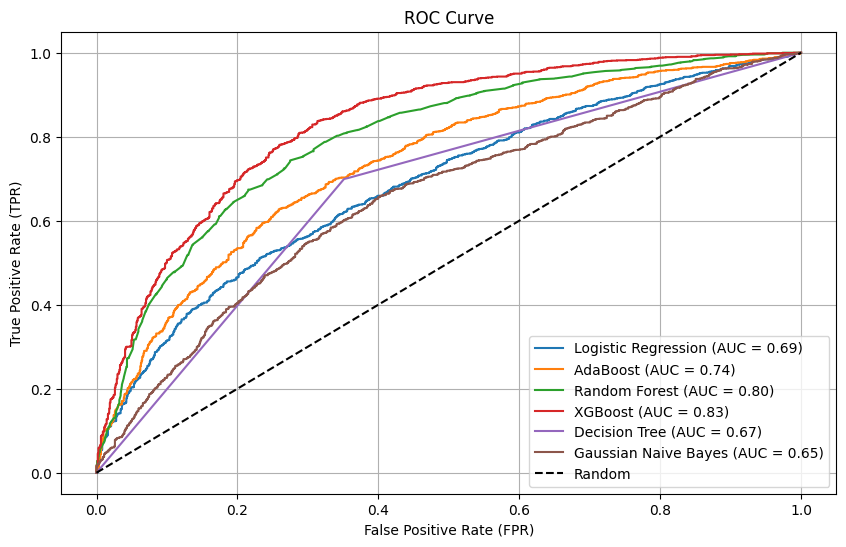

In [44]:
plt.figure(figsize=(10, 6))

for i, model in (classifiers.items()):
    model.fit(X_train, y_train)
    
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.plot(fpr_test, tpr_test, label=f'{i} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## F fold cross val

In [45]:
from sklearn.model_selection import KFold , cross_val_score
k_folds = KFold(n_splits =5)
for model_name, model in(new_classifiers.items()):
    clf = model
    scores = cross_val_score(clf ,X,y,cv = k_folds)
    print(model_name)
    print("Cross Validation Scores: ", scores)
    print("Number of CV Scores used in Average: ", len(scores))
    average_score = scores.mean()
    print(f"Average CV Score: {(average_score * 100):.4f}\n")
    

Random Forest
Cross Validation Scores:  [0.69767442 0.70949941 0.66811194 0.66062278 0.66443218]
Number of CV Scores used in Average:  5
Average CV Score: 68.0068

XGBoost
Cross Validation Scores:  [0.69176192 0.70949941 0.68111943 0.68072527 0.67507886]
Number of CV Scores used in Average:  5
Average CV Score: 68.7637

Decision Tree
Cross Validation Scores:  [0.61489949 0.63224281 0.60701616 0.60701616 0.59227129]
Number of CV Scores used in Average:  5
Average CV Score: 61.0689



## Hyperparameter tuning


In [46]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

#Best_Hyperparameters= {'colsample_bytree': [1.0], 'learning_rate': [0.1], 'max_depth':[5], 'min_child_weight':[3] , 'n_estimators': [300], 'subsample': [0.8]}
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; tot

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.0

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.0

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.0

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

## Final Model

In [47]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
auc_roc_test = metrics.roc_auc_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'AUC-ROC : {auc_roc_test:.4f}')
print(f'F1 Score : {f1_test:.4f}')

Training Accuracy: 0.8561
Test Accuracy: 0.7576
AUC-ROC : 0.7484
F1 Score : 0.7923


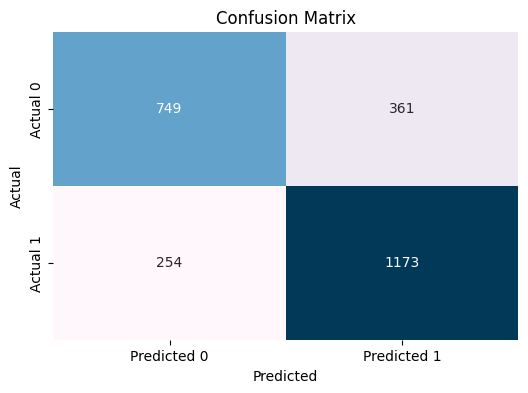

In [48]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()